# Лабораторная работа 6

# Задача 1

## Генерация датасетов

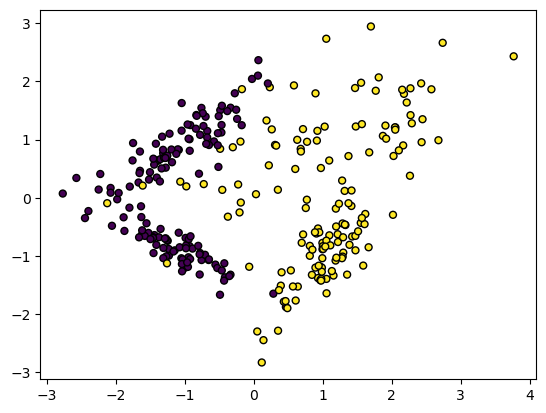

In [115]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


data_1, data_y_1 = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=130)

plt.scatter(data_1[:, 0], data_1[:, 1], marker="o", c=data_y_1, s=25, edgecolor="k")
plt.show()

In [116]:
data_1

array([[-0.02868686,  2.04388363],
       [ 2.27041985,  1.42135291],
       [-1.00147177, -1.2014376 ],
       [ 0.57937236,  1.93263194],
       [-0.46001793,  0.1371689 ],
       [-1.39042182,  0.63758649],
       [ 0.53452578, -1.24704031],
       [ 1.54846703, -0.43033484],
       [ 1.42390235, -0.66417735],
       [-0.92403547,  1.2504802 ],
       [-1.27972514,  0.51914345],
       [ 1.32606785, -0.46697709],
       [-1.65312152,  0.46476816],
       [-0.72853996,  0.23631116],
       [ 1.66229418, -0.84931764],
       [ 0.99205326, -0.77456715],
       [ 0.46298519, -1.87565333],
       [-1.89094852, -0.33448194],
       [ 0.30523929,  0.90961122],
       [-1.06901816,  0.27817863],
       [ 1.31482652,  0.11959335],
       [-1.1892571 ,  0.6121558 ],
       [-0.48923115,  1.50693568],
       [ 0.21525344,  0.55897625],
       [ 1.29471143, -0.94173345],
       [-0.22987674,  0.22994024],
       [-2.07972195,  0.1705762 ],
       [-2.77327828,  0.07403439],
       [ 0.92814203,

In [117]:
data_y_1

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

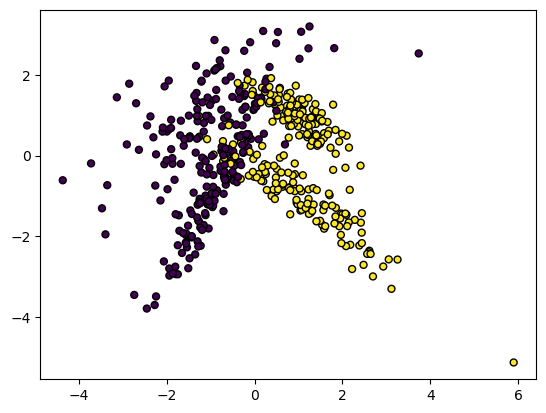

In [118]:
data_2, data_y_2 = make_classification(n_samples=500, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=100)

plt.scatter(data_2[:, 0], data_2[:, 1], marker="o", c=data_y_2, s=25, edgecolor="k")
plt.show()

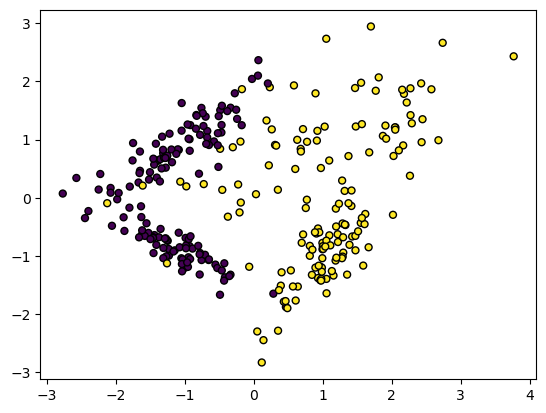

In [119]:
plt.scatter(data_1[:, 0], data_1[:, 1], marker="o", c=data_y_1, s=25, edgecolor="k")
plt.show()

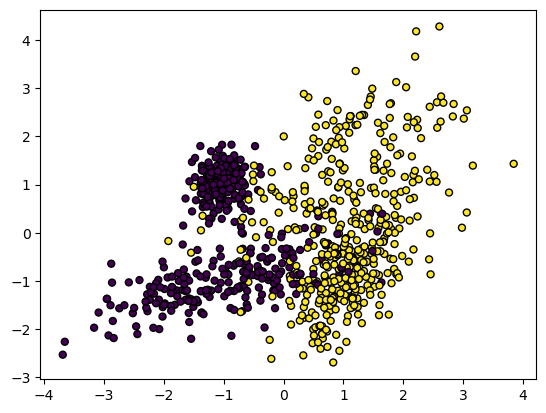

In [120]:
data_3, data_y_3 = make_classification(n_samples=900, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=200)

plt.scatter(data_3[:, 0], data_3[:, 1], marker="o", c=data_y_3, s=25, edgecolor="k")
plt.show()

In [121]:
data_3

array([[-0.58717342, -1.0223633 ],
       [ 0.32179001, -1.15806865],
       [-0.2722921 , -0.60066922],
       ...,
       [ 0.44937311,  0.50637135],
       [ 0.49874282, -0.85694015],
       [-2.06052394, -1.13159107]])

# Кластеризация

## K - means

In [122]:
from sklearn.cluster import KMeans

kmeans_1 = KMeans(2, n_init='auto').fit(data_1)
kmeans_2 = KMeans(2, n_init='auto').fit(data_2)
kmeans_3 = KMeans(2, n_init='auto').fit(data_3)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [123]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score

def cluster_and_metrics_kmeans(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    print(f"силуэт: {rand_score(claster.labels_, data_y)}")
    print(f"rand score: {silhouette_score(data, claster.labels_)}\n")
    print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data, claster.labels_)}")
    print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data, claster.labels_)}")
    plt.scatter(data[:,0], data[:,1], c=claster.labels_)
    plt.scatter(claster.cluster_centers_[:,0], claster.cluster_centers_[:,1], s=100, c='red')

Датасет: 1
силуэт: 0.875139353400223
rand score: 0.43759165636341607

индекс Калински-Харабаза: 239.1743762655582
индекс Дэвиса-Боулдина: 1.01159702590553


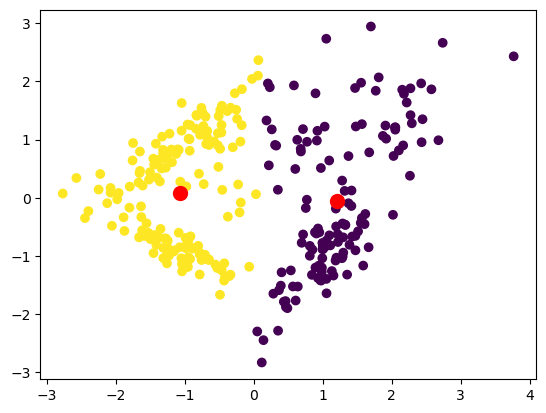

In [124]:
cluster_and_metrics_kmeans(data=data_1, data_y=data_y_1, claster=kmeans_1, num=1)

Датасет: 2
силуэт: 0.49899799599198397
rand score: 0.34461207399535043

индекс Калински-Харабаза: 262.720101518117
индекс Дэвиса-Боулдина: 1.2209642365493347


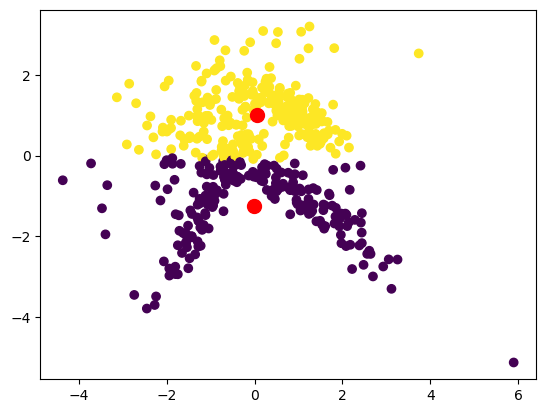

In [125]:
cluster_and_metrics_kmeans(data=data_2, data_y=data_y_2, claster=kmeans_2, num=2)

Датасет: 3
силуэт: 0.5007514522308738
rand score: 0.37421569803047366

индекс Калински-Харабаза: 514.3121462151272
индекс Дэвиса-Боулдина: 1.1927993547807776


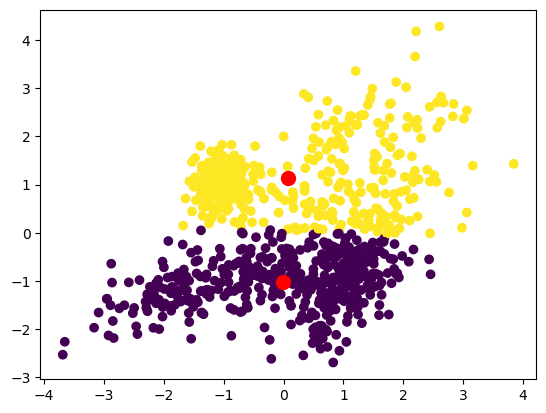

In [126]:
cluster_and_metrics_kmeans(data=data_3, data_y=data_y_3, claster=kmeans_3, num=3)

## Affinity propagation

In [127]:
from sklearn.cluster import AffinityPropagation

affinity_1 = AffinityPropagation(preference=-42).fit(data_1)
affinity_2 = AffinityPropagation(preference=-42).fit(data_2)
affinity_3 = AffinityPropagation(preference=-42).fit(data_3)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [128]:
def cluster_and_metrics_affinity(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    print(f"силуэт: {rand_score(claster.labels_, data_y)}")
    print(f"rand score: {silhouette_score(data, claster.labels_)}\n")
    print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data, claster.labels_)}")
    print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data, claster.labels_)}")
    plt.scatter(data[:,0], data[:,1], c=claster.labels_)
    plt.scatter(claster.cluster_centers_[:,0], claster.cluster_centers_[:,1], s=50, c='black')
    

Датасет: 1
силуэт: 0.627469342251951
rand score: 0.44218738638930155

индекс Калински-Харабаза: 382.71065045545294
индекс Дэвиса-Боулдина: 0.7736456782321829


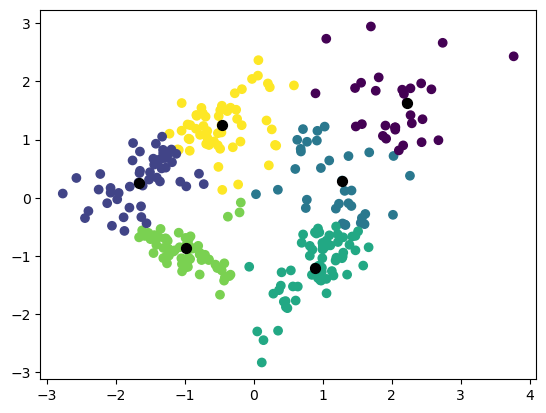

In [129]:
cluster_and_metrics_affinity(data=data_1, data_y=data_y_1, claster=affinity_1, num=1)

Датасет: 2
силуэт: 0.5557915831663327
rand score: 0.22847926644826114

индекс Калински-Харабаза: 62.597471818318446
индекс Дэвиса-Боулдина: 0.7023237582409967


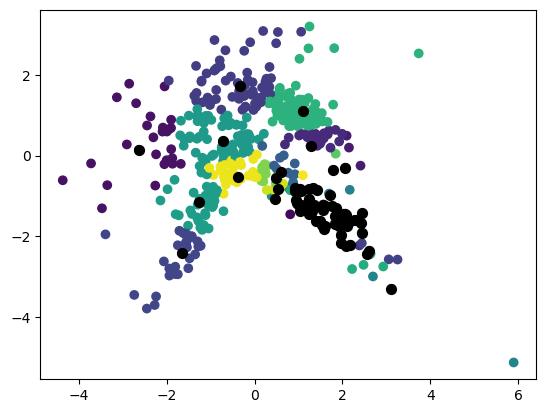

In [130]:
cluster_and_metrics_affinity(data=data_2, data_y=data_y_2, claster=affinity_2, num=2)

Датасет: 3
силуэт: 0.512868619453714
rand score: 0.06264540400025066

индекс Калински-Харабаза: 56.56798353913602
индекс Дэвиса-Боулдина: 0.49662529789561755


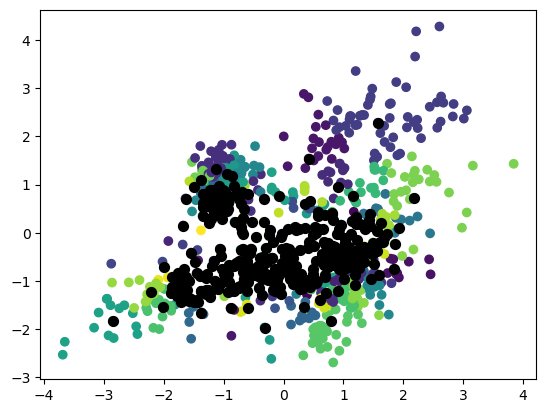

In [131]:
cluster_and_metrics_affinity(data=data_3, data_y=data_y_3, claster=affinity_3, num=3)

## DB-SCAN

In [132]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan_1 = DBSCAN().fit(data_1)
dbscan_2 = DBSCAN().fit(data_2)
dbscan_3 = DBSCAN().fit(data_3)

In [133]:
def cluster_and_metrics_dbscan(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    print(f"силуэт: {rand_score(claster.labels_, data_y)}")
    print(f"rand score: {silhouette_score(data, claster.labels_)}\n")
    print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data, claster.labels_)}")
    print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data, claster.labels_)}")
    print(np.unique(claster.labels_))
    plt.scatter(data[:,0], data[:,1], c=claster.labels_)

Датасет: 1
силуэт: 0.4991304347826087
rand score: 0.367765557373552

индекс Калински-Харабаза: 12.298862995252613
индекс Дэвиса-Боулдина: 1.4675015927198873
[-1  0]


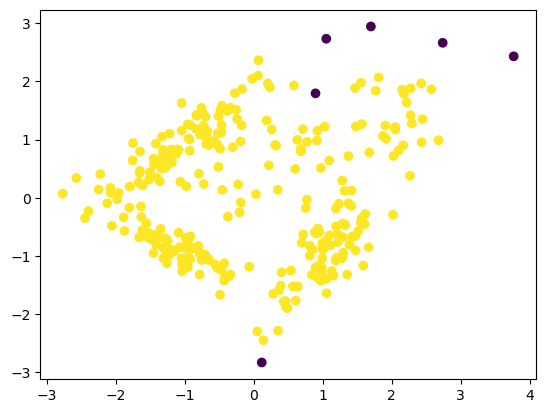

In [134]:
cluster_and_metrics_dbscan(data=data_1, data_y=data_y_1, claster=dbscan_1, num=1)

Датасет: 2
силуэт: 0.5025330661322646
rand score: 0.4050656049776778

индекс Калински-Харабаза: 4.439128278224972
индекс Дэвиса-Боулдина: 6.364757382035089
[-1  0]


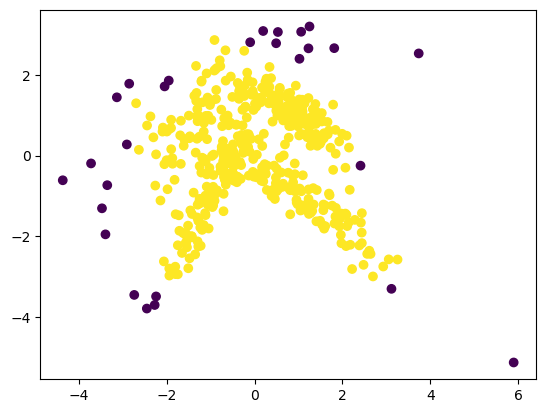

In [135]:
cluster_and_metrics_dbscan(data=data_2, data_y=data_y_2, claster=dbscan_2, num=2)

Датасет: 3
силуэт: 0.49950562353231986
rand score: 0.4364308430379813

индекс Калински-Харабаза: 4.582143802412807
индекс Дэвиса-Боулдина: 4.390903213416287
[-1  0]


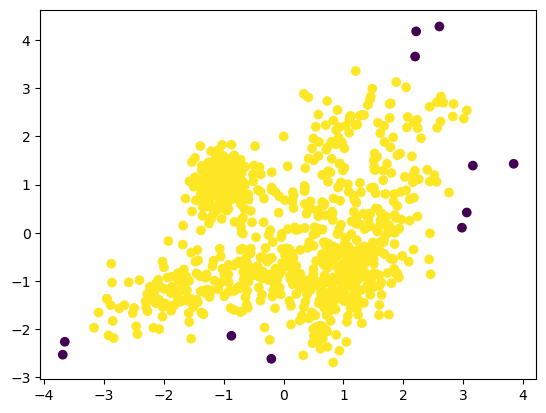

In [136]:
cluster_and_metrics_dbscan(data=data_3, data_y=data_y_3, claster=dbscan_3, num=3)

## Gaussian Mixtures, EM

In [137]:
from sklearn.mixture import GaussianMixture

gm_1 = GaussianMixture(n_components=3).fit(data_1)

gm_2 = GaussianMixture(n_components=3).fit(data_2)

gm_3 = GaussianMixture(n_components=3).fit(data_3)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [138]:
def cluster_and_metrics_gm(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    print(f"силуэт: {rand_score(claster.predict(data), data_y)}")
    print(f"rand score: {silhouette_score(data, claster.predict(data))}\n")
    print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data, claster.predict(data))}")
    print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data, claster.predict(data))}")
    plt.scatter(data[:,0], data[:,1], c=claster.predict(data))
    plt.scatter(claster.means_[:,0], claster.means_[:,1], s=100, c='red')

Датасет: 1
силуэт: 0.6140022296544035
rand score: 0.3615767996332163

индекс Калински-Харабаза: 156.63896241159694
индекс Дэвиса-Боулдина: 0.8633808580255903


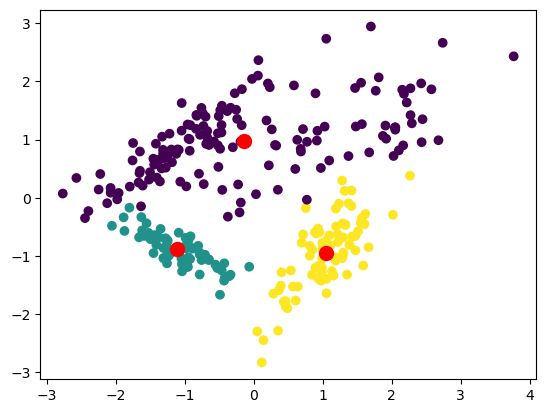

In [139]:
cluster_and_metrics_gm(data=data_1, data_y=data_y_1, claster=gm_1, num=1)

Датасет: 2
силуэт: 0.7694909819639278
rand score: 0.30115537289350996

индекс Калински-Харабаза: 196.32379733601573
индекс Дэвиса-Боулдина: 1.0105310290060572


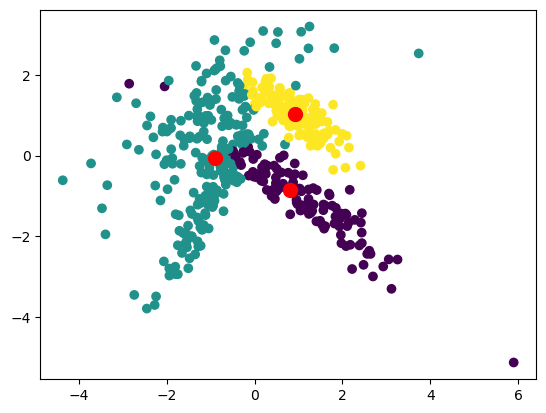

In [140]:
cluster_and_metrics_gm(data=data_2, data_y=data_y_2, claster=gm_2, num=2)

Датасет: 3
силуэт: 0.7660091459646521
rand score: 0.40436786234891414

индекс Калински-Харабаза: 539.796226335224
индекс Дэвиса-Боулдина: 0.8168592084176686


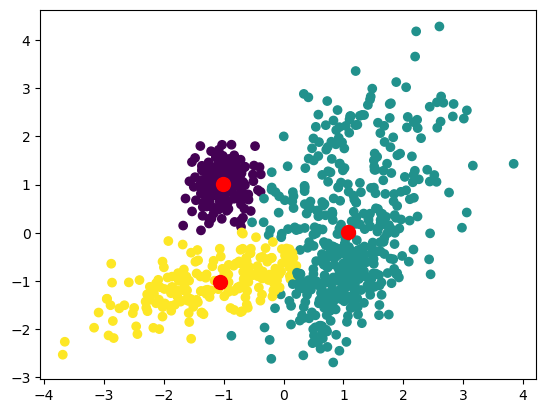

In [141]:
cluster_and_metrics_gm(data=data_3, data_y=data_y_3, claster=gm_3, num=3)

## Иерархическая кластеризация

In [142]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

clusters_1 = hierarchy.linkage(data_1, method="ward")
clusters_2 = hierarchy.linkage(data_2, method="ward")
clusters_3 = hierarchy.linkage(data_3, method="ward")

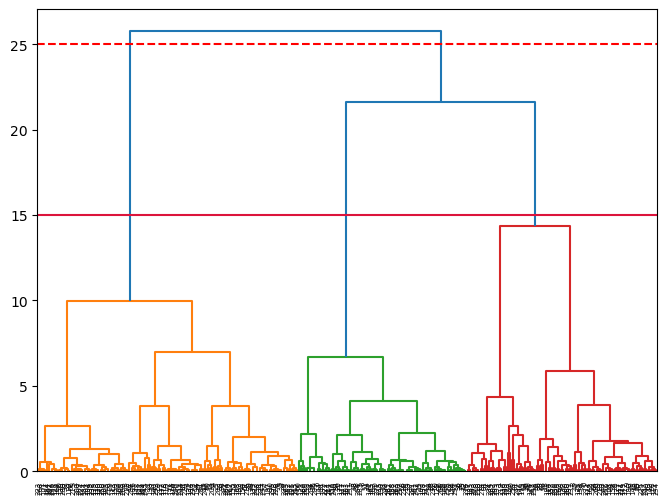

In [143]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters_1)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

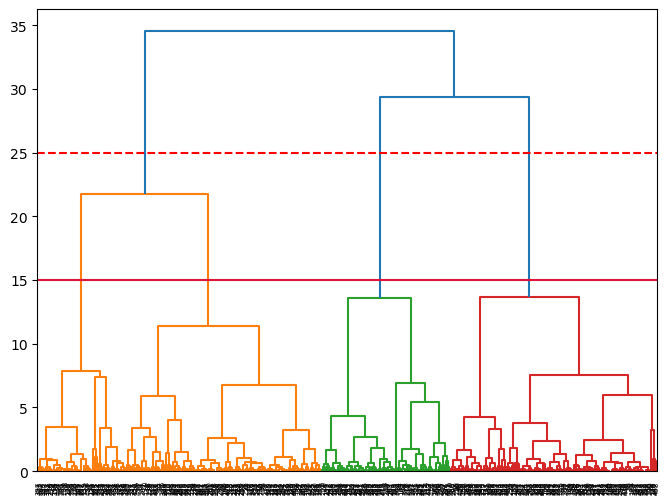

In [144]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters_2)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

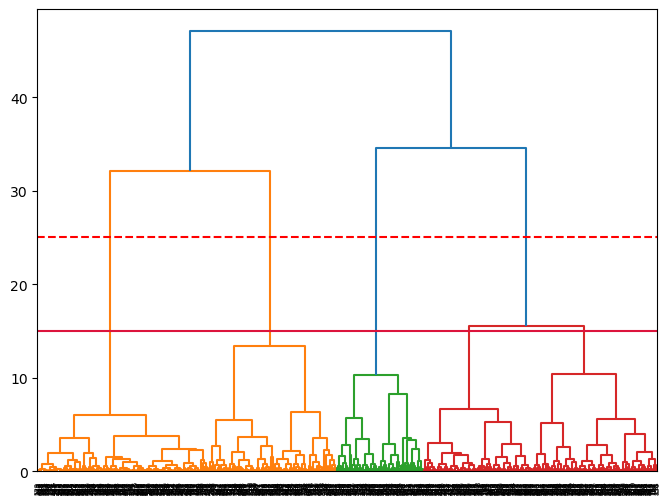

In [145]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters_3)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

In [146]:
def cluster_and_metrics_cluster(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    clustering = AgglomerativeClustering(linkage="ward").fit(data)
    print(f"силуэт: {rand_score(clustering.labels_, data_y)}")
    print(f"rand score: {silhouette_score(data, clustering.labels_)}\n")
    print(f"индекс Калински-Харабаза: {calinski_harabasz_score(data, clustering.labels_)}")
    print(f"индекс Дэвиса-Боулдина: {davies_bouldin_score(data, clustering.labels_)}")
    plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

Датасет: 1
силуэт: 0.7303010033444816
rand score: 0.36426119672929647

индекс Калински-Харабаза: 184.38499273828344
индекс Дэвиса-Боулдина: 1.0883040381203561


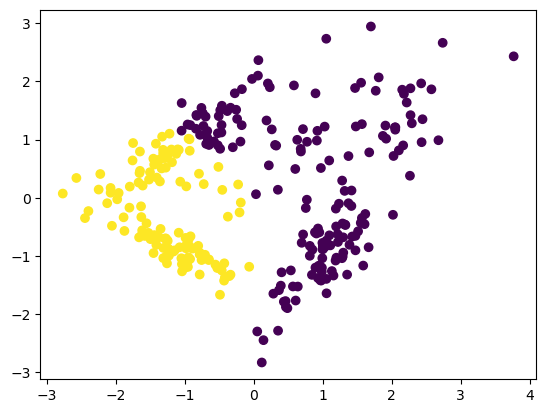

In [147]:
cluster_and_metrics_cluster(data=data_1, data_y=data_y_1, claster=clusters_1, num=1)

Датасет: 2
силуэт: 0.7853386773547094
rand score: 0.32578168526054163

индекс Калински-Харабаза: 239.7891961206974
индекс Дэвиса-Боулдина: 1.2281263155316728


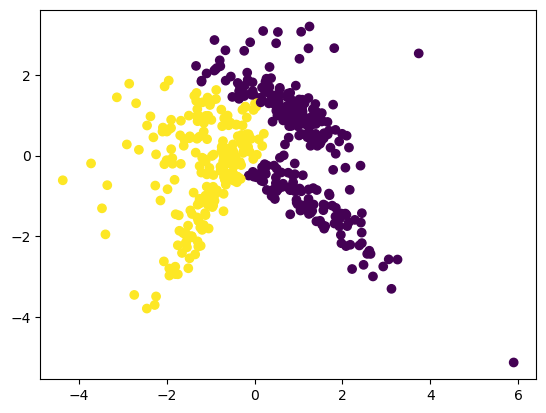

In [148]:
cluster_and_metrics_cluster(data=data_2, data_y=data_y_2, claster=clusters_2, num=2)

Датасет: 3
силуэт: 0.8197997775305895
rand score: 0.3886076411585022

индекс Калински-Харабаза: 562.0620504789613
индекс Дэвиса-Боулдина: 1.1251889910763966


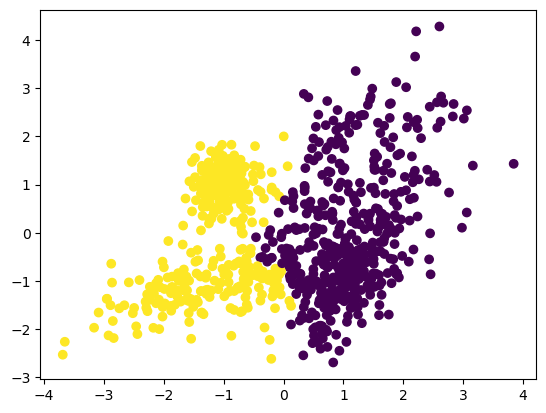

In [149]:
cluster_and_metrics_cluster(data=data_3, data_y=data_y_3, claster=clusters_3, num=3)

## Карты Кохонена

In [150]:
from sklearn_som.som import SOM

In [151]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data_1)
predictions_1 = iris_som.predict(data_1)
predictions_1

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0], d

In [152]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import davies_bouldin_score

print(rand_score(predictions_1, data_y_1))
print(jaccard_score(predictions_1, data_y_1, average="micro"))
print(silhouette_score(data_1, predictions_1))
print(davies_bouldin_score(data_1, predictions_1))

0.7983500557413601
0.06007067137809187
0.40158983209941546
1.062288810389623


In [153]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data_2)
predictions_2 = iris_som.predict(data_2)
predictions_2

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [154]:
print(rand_score(predictions_2, data_y_2))
print(jaccard_score(predictions_2, data_y_2, average="micro"))
print(silhouette_score(data_2, predictions_2))
print(davies_bouldin_score(data_2, predictions_2))

0.8391663326653307
0.8382352941176471
0.33513205315152544
1.2161153077977545


In [155]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data_3)
predictions_3 = iris_som.predict(data_3)
predictions_3

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,

In [156]:
print(rand_score(predictions_3, data_y_3))
print(jaccard_score(predictions_3, data_y_3, average="micro"))
print(silhouette_score(data_3, predictions_3))
print(davies_bouldin_score(data_3, predictions_3))

0.8251612903225807
0.8237082066869301
0.39545884082430394
1.1132742208615505


# Задача 2

In [157]:
import pandas as pd

data_class = pd.read_csv(r"D:\programming\GitHub_repositories\RGR_ML_3_SEM\project\data\datasets\classification_data.csv")[:1000]
data_reg = pd.read_csv(r"D:\programming\GitHub_repositories\RGR_ML_3_SEM\project\data\datasets\regression_data.csv")[:1000]

In [158]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler



In [159]:
y_class = data_class["fraud"].to_numpy()
x_class = data_class.drop(["fraud"], axis=1).to_numpy()

y_reg = data_reg["price"].to_numpy()
x_reg = data_reg.drop(["price"], axis=1).to_numpy()

# Kmeans 

In [160]:
kmeans_reg = KMeans().fit(x_reg)

kmeans_class = KMeans().fit(x_class)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

Датасет: None
силуэт: 0.8585645645645645
rand score: 0.2069915350028845

индекс Калински-Харабаза: 220.6732355466893
индекс Дэвиса-Боулдина: 1.4921091728540112


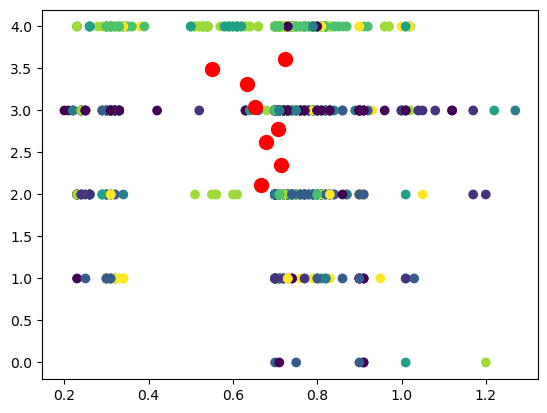

In [161]:
cluster_and_metrics_kmeans(x_reg, y_reg, kmeans_reg)

Датасет: None
силуэт: 0.2785085085085085
rand score: 0.44598667108066326

индекс Калински-Харабаза: 3243.1883027083845
индекс Дэвиса-Боулдина: 0.6773248636681359


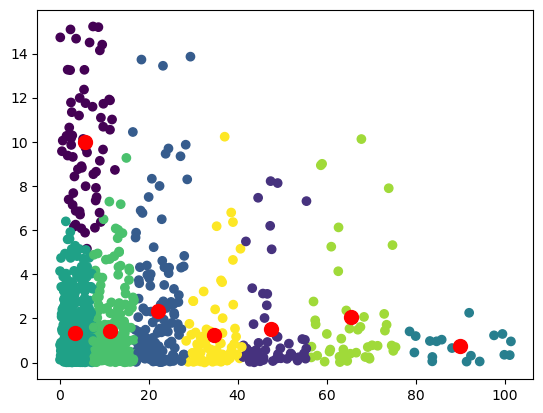

In [162]:
cluster_and_metrics_kmeans(x_class, y_class, kmeans_class)

# Иерархическая кластеризация

In [163]:
cluster_reg = hierarchy.linkage(x_reg, method="ward")

cluster_class = hierarchy.linkage(x_class, method="ward")

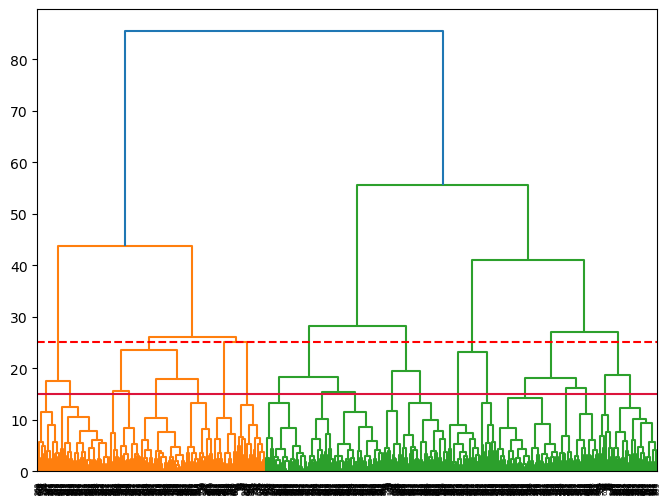

In [164]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(cluster_reg)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

Датасет: None
силуэт: 0.4672412412412412
rand score: 0.2595322101485424

индекс Калински-Харабаза: 336.40353393578033
индекс Дэвиса-Боулдина: 1.5569940316881485


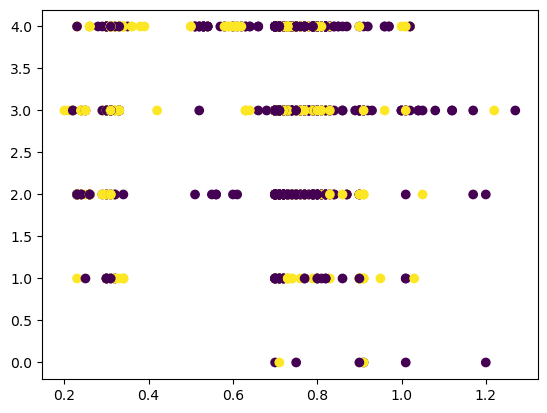

In [165]:
cluster_and_metrics_cluster(x_reg, y_reg, cluster_reg)

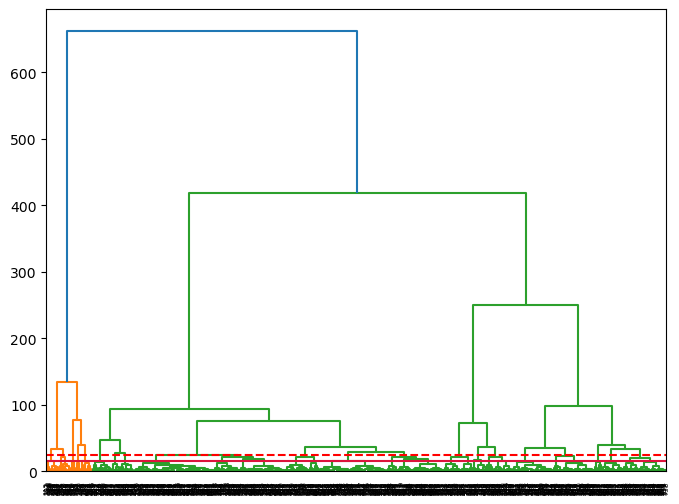

In [166]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(cluster_class)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

Датасет: None
силуэт: 0.804004004004004
rand score: 0.7072572543849172

индекс Калински-Харабаза: 1369.220814755698
индекс Дэвиса-Боулдина: 0.3902898785630678


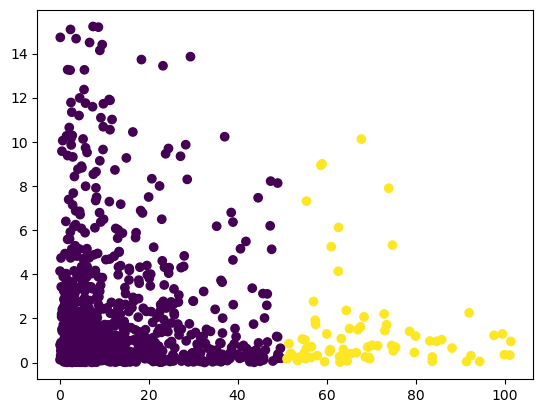

In [167]:
cluster_and_metrics_cluster(x_class, y_class, cluster_class)

# DBScan

In [168]:
dbscan_reg = DBSCAN().fit(x_reg)

dbscan_class = DBSCAN().fit(x_class)

Датасет: None
силуэт: 0.12821821821821822
rand score: -0.3982495132071806

индекс Калински-Харабаза: 5.079826924862223
индекс Дэвиса-Боулдина: 1.553405803820808
[-1  0  1  2  3  4  5  6  7  8]


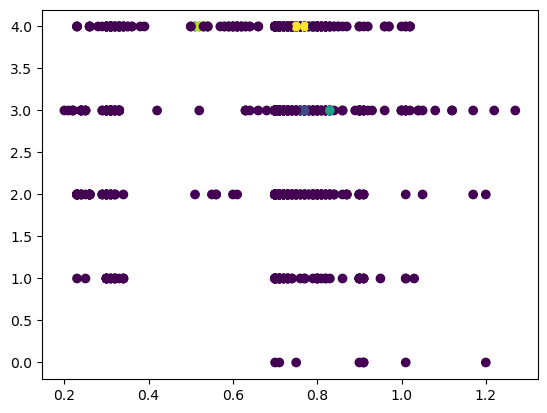

In [169]:
cluster_and_metrics_dbscan(x_reg, y_reg, dbscan_reg)

Датасет: None
силуэт: 0.8466246246246246
rand score: -0.38095443864655054

индекс Калински-Харабаза: 5.226657524967904
индекс Дэвиса-Боулдина: 1.1084872529353262
[-1  0  1  2  3]


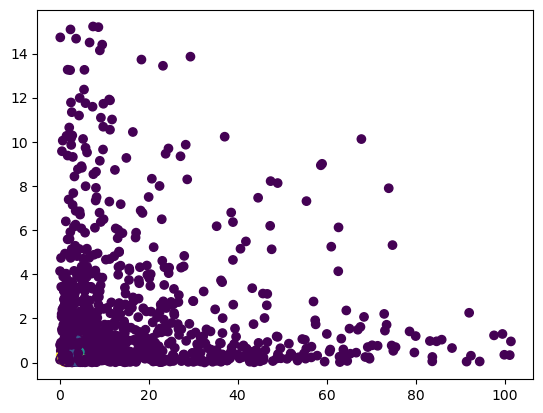

In [170]:
cluster_and_metrics_dbscan(x_class, y_class, dbscan_class)